# Wstęp do Multimediów
### Laboratorium 2
Łukasz Jaremek

310710

---

In [23]:
STUDENT_NUMBER = 310710
IMAGES = 36

IMAGE_NUMBER = STUDENT_NUMBER % IMAGES
print("Image number:", IMAGE_NUMBER)


Image number: 30


# Ładowanie zdjęć do Pythona

In [24]:
import os

folders = {}

for subdir, _, files in os.walk("obrazy_testowe"):
    if "\\" in subdir:
        folders[subdir] = files


# Wyświetlanie zdjęć studenta i zapisywanie ich do słownika.

Image path: obrazy_testowe\color\sailboat_col.png


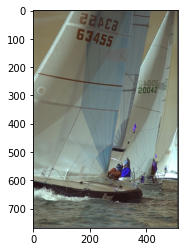

Image path: obrazy_testowe\color_inoise1\sailboat_col_inoise.png


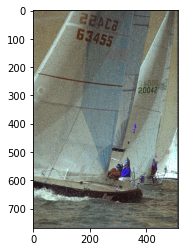

Image path: obrazy_testowe\color_inoise2\sailboat_col_inoise.png


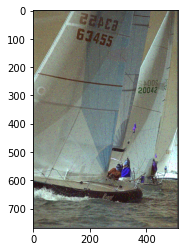

Image path: obrazy_testowe\color_noise\sailboat_col_noise.png


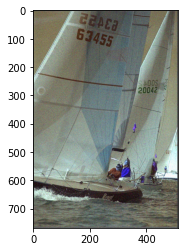

In [25]:
from matplotlib import pyplot as plt
import cv2

the_images = {}

for folder in folders:
    image_path = folder + "\\" + folders[folder][IMAGE_NUMBER]
    print("Image path:", image_path)

    folder_name = folder.split("\\")[-1]    
    the_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    the_images[folder_name] = the_image

    plt.imshow(the_image, cmap="gray", vmin=0, vmax=255)
    plt.show()


# Zadanie 1

Zrealizować operację filtracji barwnego obrazu cyfrowego. \
Do realizacji zadania wykorzystać obrazy zaszumione (szumem gaussowskim oraz impulsowym). \
Każdy z obrazów wejściowych poddać przetwarzaniu filtrem wygładzającym (Gaussa) i filtrem \
medianowym. Każdy obraz wynikowy wyświetlić i obliczyć dla niego PSNR (w stosunku do obrazu \
oryginalnego, nie zaszumionego!, funkcja do obliczania PSNR dostępna jest w przykładowym \
skrypcie). Ocenić działanie filtrów dla masek o rozmiarach: 3x3, 5x5, 7x7. \
Zebrać w tabeli PSNR dla różnych rodzajów szumów, filtrów i rozmiarów maski. \
Jaki wpływ na skuteczność filtracji i na zniekształcenie obrazu ma rozmiar maski filtru? \
Czy ocena subiektywna uzyskanych obrazów wynikowych, jest zgodna z PSNR (lepsza jakość – \
większy PSNR)? \
Opisać wnioski w sprawozdaniu.


# Zadanie 1.1 - Gaussian Blur

In [26]:
import numpy as np


def calcPSNR(img1: np.ndarray, img2: np.ndarray) -> float:
  imax = 255.**2  # Zakładana wartość pikseli z przedziału [0, 255]
  # W różnicy obrazów istotne są wartości ujemne, dlatego img1 konwertowany do typu np.float64 
  # (liczby rzeczywiste) aby nie ograniczać wyniku do przedziału [0, 255].
  mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size  # img1.size - liczba elementów w img1, 
  # ==img1.shape[0]*img1.shape[1] dla obrazów mono, 
  # ==img1.shape[0]*img1.shape[1]*img1.shape[2] dla obrazów barwnych
  return 10.0*np.log10(imax/mse)


Image name: color_inoise1


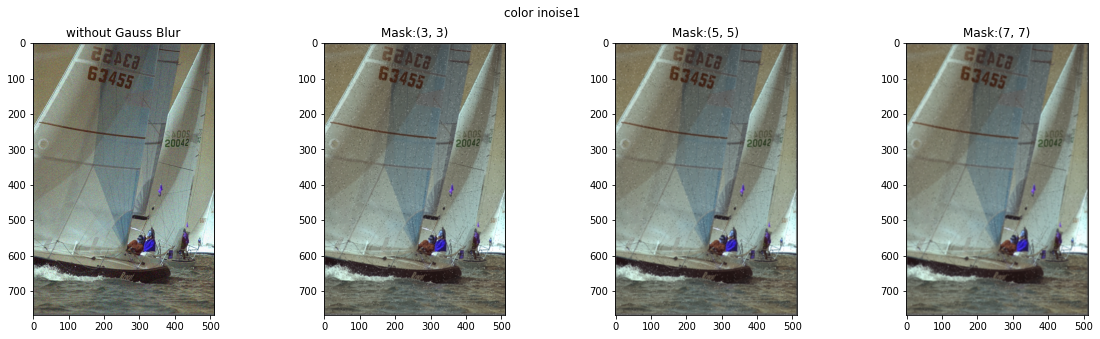

Image name: color_inoise2


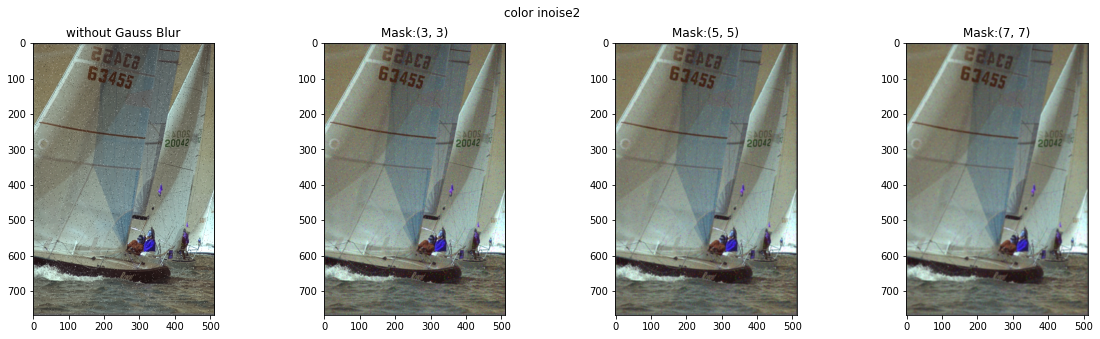

Image name: color_noise


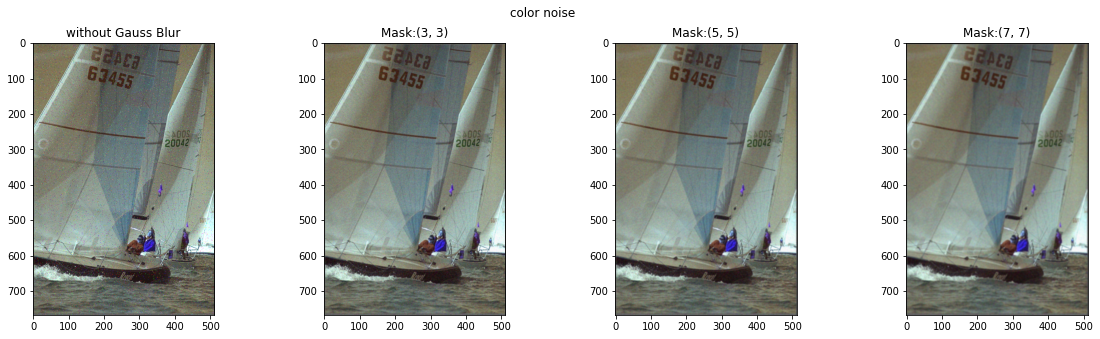

In [39]:
results_dict = {"Gauss":  {3: 0, 5: 0, 7: 0},
                "Median": {3: 0, 5: 0, 7: 0}}

color_image = the_images["color"]
image_names = ("color_inoise1", "color_inoise2", "color_noise")
mask_sizes = ((3, 3), (5, 5), (7, 7))

for image_name in image_names:
    figure, axs = plt.subplots(1, 4, figsize=(20, 5))
    figure.suptitle(" ".join(image_name.split("_")))

    axs[0].imshow(the_image, cmap="gray", vmin=0, vmax=255)
    axs[0].title.set_text("without Gauss Blur")

    print("Image name:", image_name)
    for j, mask_size in enumerate(mask_sizes):

        the_image = the_images[image_name]
        gauss_blur = cv2.GaussianBlur(the_image, mask_size, 0)
        axs[j+1].imshow(gauss_blur, cmap="gray", vmin=0, vmax=255)
        axs[j+1].title.set_text(f"Mask:{mask_size}")

        psnr = calcPSNR(color_image, gauss_blur)

        results_dict["Gauss"][mask_size[0]] = psnr

    plt.show()


# Zadanie 1.2 - Median Blur

Image name: color_inoise1


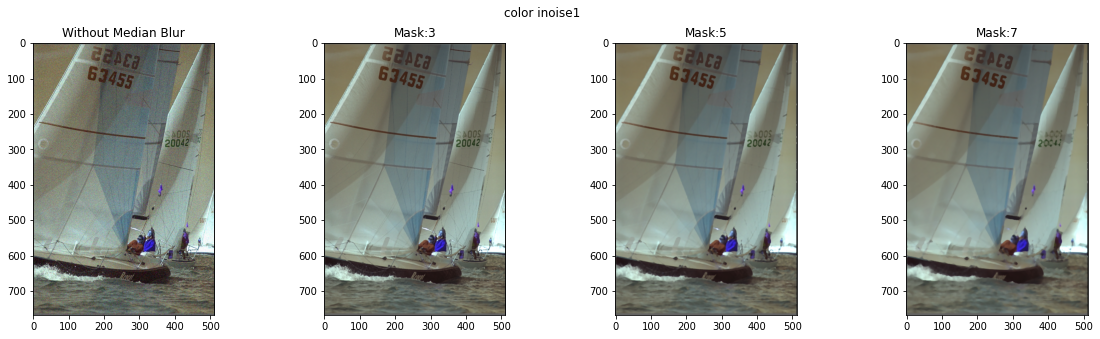

Image name: color_inoise2


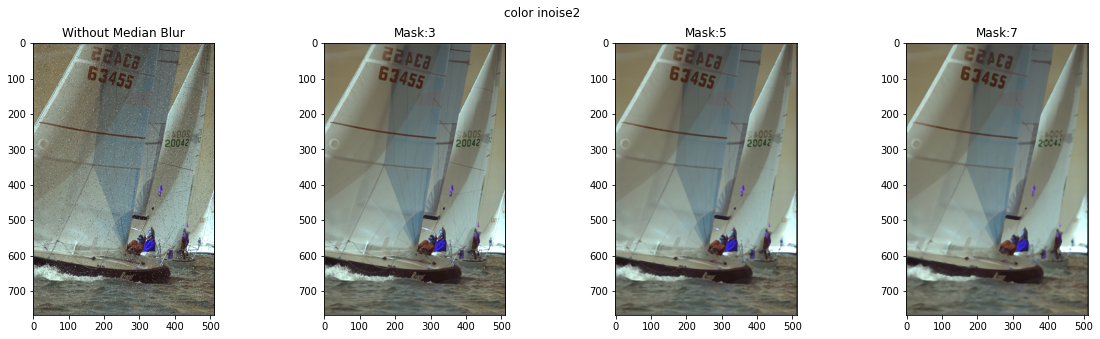

Image name: color_noise


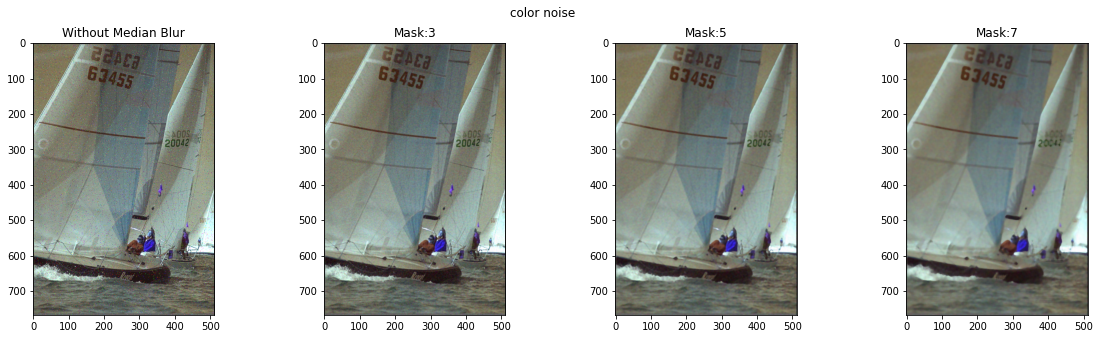

In [40]:
mask_sizes = (3, 5, 7)

for image_name in image_names:
    figure, axs = plt.subplots(1, 4, figsize=(20, 5))
    figure.suptitle(" ".join(image_name.split("_")))

    axs[0].imshow(the_image, cmap="gray", vmin=0, vmax=255)
    axs[0].title.set_text("Without Median Blur")

    print("Image name:", image_name)
    for j, mask_size in enumerate(mask_sizes):

        the_image = the_images[image_name]
        median_blur = cv2.medianBlur(the_image, mask_size)
        axs[j+1].imshow(median_blur, cmap="gray", vmin=0, vmax=255)
        axs[j+1].title.set_text(f"Mask:{mask_size}")

        psnr = calcPSNR(color_image, median_blur)

        results_dict["Median"][mask_size] = psnr

    plt.show()


In [38]:
print("Tabela PSNR\n")
print("Maska\t3\t5\t7")

for key in results_dict:
    print(key, *[round(number, 2) for number in results_dict[key].values()], sep="\t")


Tabela PSNR

Maska	3	5	7
Gauss	29.99	29.26	28.1
Median	29.32	27.99	27.06


## Podsumowanie

Filtry nie spisały się najlepiej, efekt jest niezadowalający ponieważ zdjęcia i tak są rozmazane. \
Co więcej, przy zwiększaniu maski rozmazanie obrazu tylko rosło. \
Współczynnik PSNR natomiast faktycznie działa i realnie odwzorowuje skuteczność filtrów: \
Im większy współczynnik, tym wyraźniejsze zdjęcie.


## Zadanie 2 - Rozciąganie histogramu

Zrealizować operację wyrównania histogramu dla obrazu barwnego i zapisać obraz wynikowy do \
pliku. UWAGA: operację wyrównania histogramu należy wykonać wyłącznie dla składowej \
odpowiadającej za jasność, w tym celu należy wejściowy obraz RGB skonwertować do innej \
przestrzeni (np. YCbCr/YUV), a po wyrównaniu histogramu dla właściwej składowej powrócić do \
pierwotnego formatu. \
Porównać uzyskane obrazy i ich histogramy (w szczególności: histogram dla składowej, dla której \
wykonano operację wyrównywania histogramu). \
Czy obraz po wyrównaniu histogramu jest subiektywnie lepszej jakości?


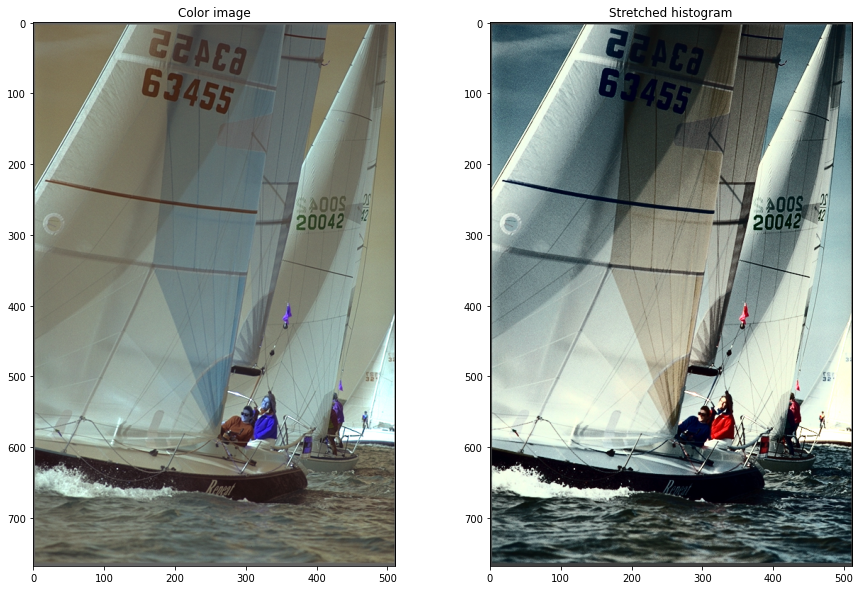

In [30]:
color_image = the_images["color"]

his_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)
his_image[:, :, 0] = cv2.equalizeHist(his_image[:, :, 0])
his_image = cv2.cvtColor(his_image, cv2.COLOR_YCR_CB2BGR)

figure, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(color_image, cmap="gray", vmin=0, vmax=255)
axs[0].title.set_text(f"Color image")
axs[1].imshow(his_image, cmap="gray", vmin=0, vmax=255)
axs[1].title.set_text("Stretched histogram")
plt.show()
    

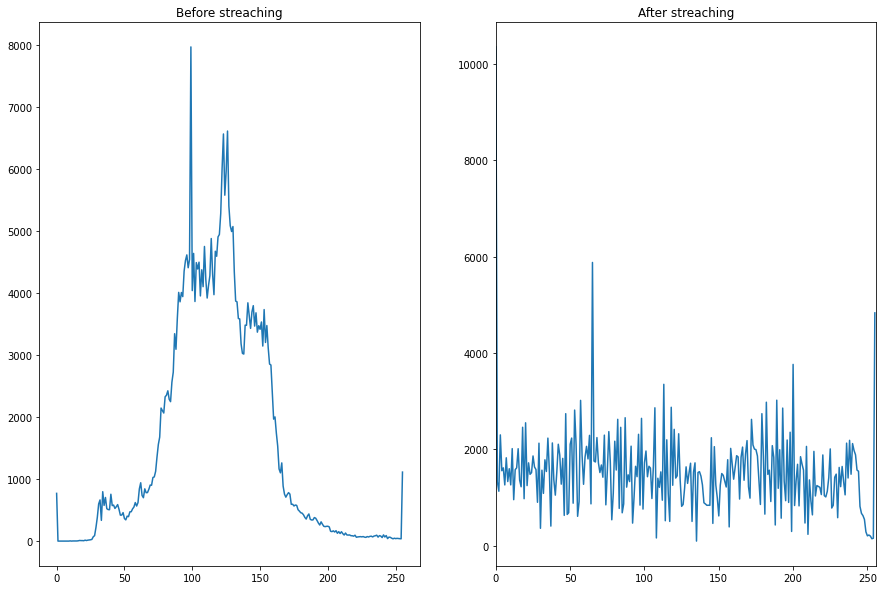

In [31]:
figure, axs = plt.subplots(1, 2, figsize=(15, 10))

before_histogram = cv2.calcHist([color_image], [0], None, [256], [0, 256]).flatten()
after_histogram = cv2.calcHist([his_image], [0], None, [256], [0, 256]).flatten()
axs[0].plot(before_histogram)
axs[0].title.set_text("Before streaching")
axs[1].plot(after_histogram)
axs[1].title.set_text("After streaching")

plt.xlim([0, 256])
plt.show()


## Podsumowanie

Rozciągnięcie histogramu faktycznie dało bardzo dobry i zauważalny efekt. \
Zdjęcie jest delikatnie wyraźniejsze, ma żywsze kolory i co najważniejsze, kolory nie są zakłamane, co można uznać za duży sukces. \
Rozciągnięcie histogramu możemy ze strony matematycznej zauważyć na wykresach, \
gdzie nie jest skumulowany w centrum tylko w miarę regularnie rozłożony na całej osi X.


## Zadanie 3 - filtr Laplace’a

Korzystając z filtru Laplace’a do wyznaczenia wysokoczęstotliwościowych składowych obrazu \
dokonać wyostrzenia obrazu:

$ImgOut = ImgIn + W*ImgLaplace$

Jaki jest wpływ wagi składowej wysokoczęstotliwościowej na postać obrazu wynikowego? \
Dla jakich wartości tej wagi uzyskuje się dobre, przyjemne dla oka wyniki? \
Uwaga: należy pamiętać, że wyostrzanie obrazu powoduje również uwydatnienie szumu w obrazie, \
w niektórych przypadkach (niezbyt dobrej jakości obrazów oryginalnych) przydatne może być wstępne \
wygładzenie obrazu filtrem dolnoprzepustowym (np. filtrem Gaussa). \
Wskazówka: wykorzystać funkcję cv2.addWeighted() do sumowania obrazów i równoczesnej \
konwersji wyniku do 8-bitowych liczb całkowitych z przedziału [0, 255]. \
Uwaga: ze względu na sposób wyliczania laplasjanu w bibliotece OpenCV w celu uzyskania \
‘dobrych’ wyników należy odjąć ‘obraz wysokoczęstotliwościowy’, czyli zastosować ujemne \
wartości wagi W.


In [32]:
float_image = color_image/255

lapl_img = cv2.Laplacian(float_image, cv2.CV_64F)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


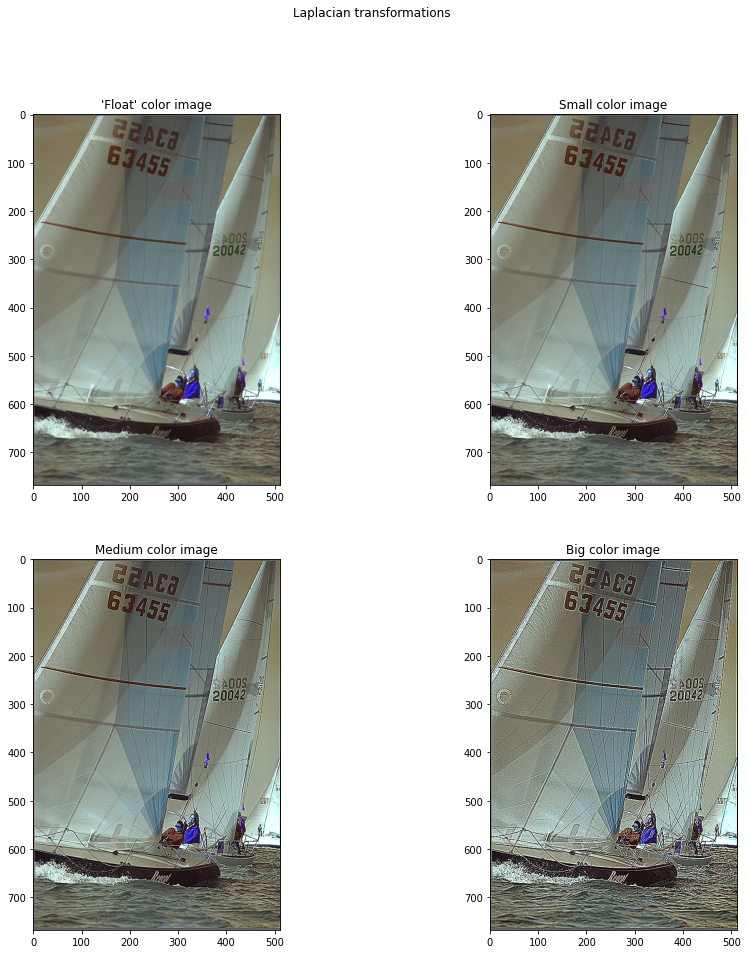

In [33]:
image_small = cv2.addWeighted(lapl_img, -0.5, float_image, 1, 0.0)
image_medium = cv2.addWeighted(lapl_img, -1.5, float_image, 1, 0.0)
image_big = cv2.addWeighted(lapl_img, -4, float_image, 1, 0.0)


figure, axs = plt.subplots(2, 2, figsize=(15, 15))
figure.suptitle("Laplacian transformations")

axs[0, 0].imshow(float_image, cmap="gray", vmin=0, vmax=255)
axs[0, 0].title.set_text("'Float' color image")
axs[0, 1].imshow(image_small, cmap="gray", vmin=0, vmax=255)
axs[0, 1].title.set_text("Small color image")
axs[1, 0].imshow(image_medium, cmap="gray", vmin=0, vmax=255)
axs[1, 0].title.set_text("Medium color image")
axs[1, 1].imshow(image_big, cmap="gray", vmin=0, vmax=255)
axs[1, 1].title.set_text("Big color image")

plt.show()


## Podsumowanie

Dla wartości -0.5 obraz jest ładnie wyostrzony. \
Dla wartości większych, bliższych zera, wyostrzenie jest niezauważalne. \
Natomisat dla wartości mniejszych (-2; -4) wyostrzenie jest za duże i rozmazuje obraz.
